## Data Visualization

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_hdf('dfAMI_tidy.hdf5', 'datehrAMI_tr')

In [5]:
dfAMI = df.T.copy()

### Labels

In [8]:
dfEV = pd.read_csv('uopdata_EV_list.csv')

In [10]:
len(set(dfEV.dln_house) & set(dfAMI.index))

999

In [11]:
len(dfEV.dln_house)

3781

In [12]:
evs = {t:(t in set(dfEV.dln_house)) for t in dfAMI.index}
#evs

In [13]:
evind = [t in set(dfEV.dln_house) for t in dfAMI.index]
evind[:5]

[True, True, True, False, True]

### hasEV and noEV df's

In [14]:
df_hasEV = dfAMI.iloc[evind]
df_noEV = dfAMI.iloc[np.logical_not(evind)] 

In [15]:
df_hasEV.head()

,2017-01-01 00:00:00,2017-01-01 01:00:00,2017-01-01 02:00:00,2017-01-01 03:00:00,2017-01-01 04:00:00,2017-01-01 05:00:00,2017-01-01 06:00:00,2017-01-01 07:00:00,2017-01-01 08:00:00,2017-01-01 09:00:00,...,2017-12-31 14:00:00,2017-12-31 15:00:00,2017-12-31 16:00:00,2017-12-31 17:00:00,2017-12-31 18:00:00,2017-12-31 19:00:00,2017-12-31 20:00:00,2017-12-31 21:00:00,2017-12-31 22:00:00,2017-12-31 23:00:00
1001225,0.2736,0.2676,0.2760,0.2448,0.2700,0.2952,0.2484,0.2508,0.2460,0.2820,...,0.3972,2.4684,0.8388,3.0708,1.1916,2.4384,1.1256,1.1304,0.7944,2.5908
1001619,0.4500,0.4416,0.4260,0.4428,0.4668,0.4536,0.4116,0.5316,0.5280,0.4200,...,0.3948,0.4284,0.6108,0.6000,0.5904,0.6948,0.5268,0.3516,0.4824,0.5160
1001637,2.1960,2.2308,2.2596,2.2704,2.2224,2.3748,1.6536,0.9888,1.4460,1.7304,...,0.9600,0.6360,0.3000,0.5040,0.7092,0.8052,0.9336,0.7596,0.5544,0.5244
1001684,0.3144,0.3024,0.2808,0.6768,0.2652,0.3240,0.2424,0.3288,0.2388,0.2940,...,0.6396,0.3684,0.3996,2.6568,0.4356,0.7860,0.4680,1.6848,0.4620,0.4944
1002991,0.6468,0.5232,0.5940,0.5472,1.1016,3.9528,4.5732,0.7956,0.9828,0.3720,...,3.9396,3.5172,1.5696,1.5348,1.2228,1.2276,0.9828,1.0272,1.1028,0.8832


In [16]:
has_ev = df_hasEV.reset_index()

In [12]:
len(df_noEV)

1999

In [13]:
len(df_hasEV)

999

In [14]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

### No EV interactive visualization

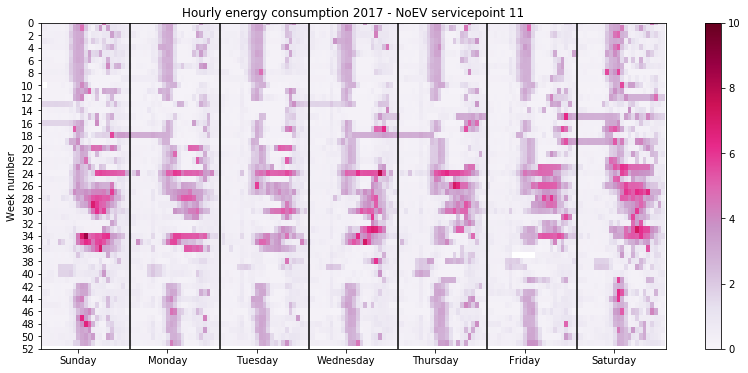

In [16]:
%matplotlib inline

def powerimgNoEV(n):
    plt.figure(figsize = (14,6))
    plt.imshow(np.reshape(df_noEV.iloc[n,:8736].values,(52,168)), cmap="PuRd", 
               interpolation='none', vmin=0, vmax=10, aspect='auto')
    plt.colorbar()
    plt.plot([24,24],[0,52],"-k")
    plt.plot([48,48],[0,52],"-k")
    plt.plot([72,72],[0,52],"-k")
    plt.plot([96,96],[0,52],"-k")
    plt.plot([120,120],[0,52],"-k")
    plt.plot([144,144],[0,52],"-k")
    plt.xlim(0,168)
    plt.ylim(52,0)
    plt.gca()
    yticks = range(0,53,2)
    weekdays = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    plt.xticks(np.arange(7)*168/7+10, weekdays)
    plt.yticks(yticks)
    plt.title("Hourly energy consumption 2017 - NoEV servicepoint {}".format(n))
    plt.ylabel("Week number")
    
    ;
#    plt.show()

interact(powerimgNoEV, n=widgets.IntSlider(
    value=0,
    min=0,
    max=998,
    step=1,
    description='Service Point:',
    disabled=False));

### Has EV

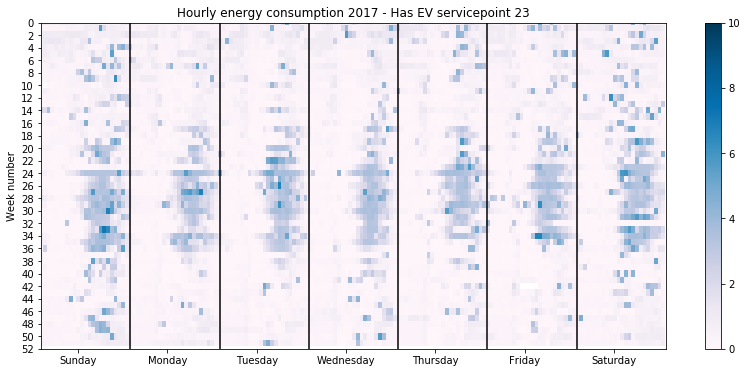

In [24]:
def powerimgHasEV(n):
    plt.figure(figsize = (14,6))
    plt.imshow(np.reshape(df_hasEV.iloc[n,:8736].values,(52,168)), cmap="PuBu", 
               interpolation='none', vmin=0, vmax=10, aspect='auto')
    plt.colorbar()
    plt.plot([24,24],[0,52],"-k")
    plt.plot([48,48],[0,52],"-k")
    plt.plot([72,72],[0,52],"-k")
    plt.plot([96,96],[0,52],"-k")
    plt.plot([120,120],[0,52],"-k")
    plt.plot([144,144],[0,52],"-k")
    plt.xlim(0,168)
    plt.ylim(52,0)
    yticks = range(0,53,2)
    weekdays = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    plt.xticks(np.arange(7)*168/7+10, weekdays)
    plt.yticks(yticks)
    plt.title("Hourly energy consumption 2017 - Has EV servicepoint {}".format(n))
    plt.ylabel("Week number")
#    plt.show()

interact(powerimgHasEV, n=widgets.IntSlider(
    value=0,
    min=0,
    max=998,
    step=1,
    description='Service Point:',
    disabled=False));

My own usage (from PG&E data)

In [20]:
jhkw = pd.read_csv('../Data/JH_pgeData2017.csv')

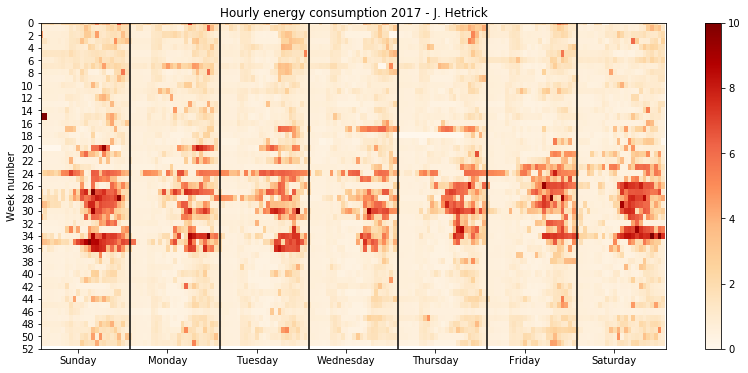

In [23]:
%matplotlib inline

plt.figure(figsize = (14,6))
plt.imshow(jhkw.USAGE[:8736].values.reshape(52,168),cmap="OrRd",interpolation='none',
          vmin=0, vmax=10, aspect='auto')
plt.plot([24,24],[0,52],"-k")
plt.plot([48,48],[0,52],"-k")
plt.plot([72,72],[0,52],"-k")
plt.plot([96,96],[0,52],"-k")
plt.plot([120,120],[0,52],"-k")
plt.plot([144,144],[0,52],"-k")
plt.xlim(0,168)
plt.ylim(52,0)
yticks = range(0,53,2)
weekdays = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(np.arange(7)*168/7+10, weekdays)
plt.yticks(yticks)
plt.title("Hourly energy consumption 2017 - J. Hetrick")
plt.ylabel("Week number")
plt.colorbar();

---

$$-\infty-$$

---

#### Fulfilled Date and Charging Pattern

Margaret suggested to check that the "*FulfilledDate*" (validation of EV ownership) in the following `servicepoint` be compared with its week-day graph.

Service point index 24 in the DF:

In [31]:
df_hasEV.index[24]

1006241

In [32]:
dfEV.iloc[24]

premise                6241
dln_house           1006241
dln_ev                  NaN
program                  EV
Detail                 M_EV
FulfilledDate    09/07/2017
Name: 24, dtype: object

In [33]:
import datetime

# Return a 3-tuple containing ISO year, week number, and weekday
datetime.date(2017, 9, 7).isocalendar()

(2017, 36, 4)

Its "*FulfilledDate*" is in week **36**, exactly where the charging pattern starts in the figure below.

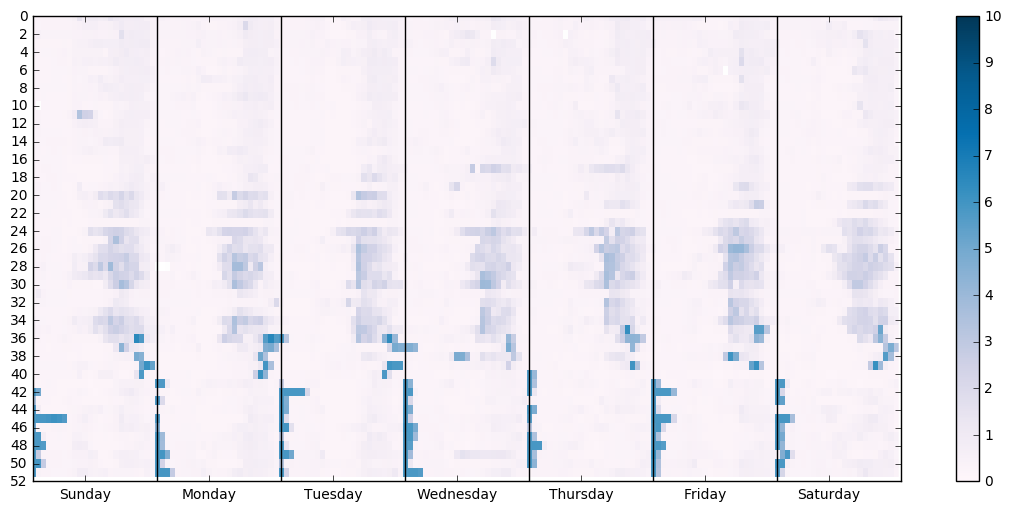

In [34]:
n = 24

plt.figure(figsize = (14,6))
plt.imshow(np.reshape(df_hasEV.iloc[n,:8736].values,(52,168)), cmap="PuBu", 
               interpolation='none', vmin=0, vmax=10, aspect='auto')
plt.colorbar()
plt.plot([24,24],[0,52],"-k")
plt.plot([48,48],[0,52],"-k")
plt.plot([72,72],[0,52],"-k")
plt.plot([96,96],[0,52],"-k")
plt.plot([120,120],[0,52],"-k")
plt.plot([144,144],[0,52],"-k")
plt.xlim(0,168)
plt.ylim(52,0)

plt.gca()
yticks = range(0,53,2)
weekdays = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(np.arange(7)*168/7+10, weekdays)
plt.yticks(yticks);

Another:

In [35]:
dfEV.iloc[26]

premise                6641
dln_house           1006641
dln_ev                  NaN
program                  EV
Detail                 M_EV
FulfilledDate    07/08/2017
Name: 26, dtype: object

In [36]:
datetime.date(2017, 7, 8).isocalendar()

(2017, 27, 6)

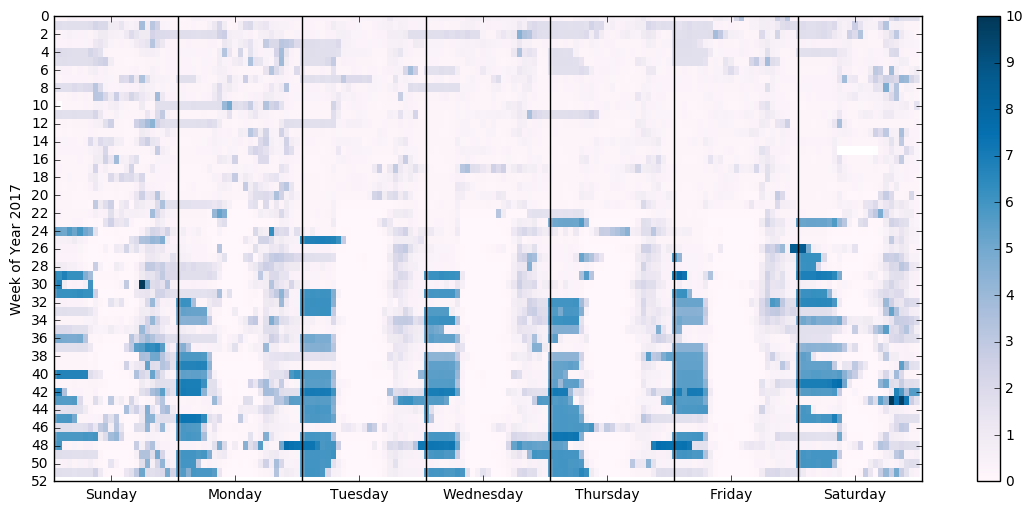

In [37]:
n = 26

plt.figure(figsize = (14,6))
plt.imshow(np.reshape(df_hasEV.iloc[n,:8736].values,(52,168)), cmap="PuBu", 
               interpolation='none', vmin=0, vmax=10, aspect='auto')
plt.colorbar()
plt.plot([24,24],[0,52],"-k")
plt.plot([48,48],[0,52],"-k")
plt.plot([72,72],[0,52],"-k")
plt.plot([96,96],[0,52],"-k")
plt.plot([120,120],[0,52],"-k")
plt.plot([144,144],[0,52],"-k")
plt.xlim(0,168)
plt.ylim(52,0)

plt.ylabel("Week of Year 2017")
plt.gca()
yticks = range(0,53,2)
weekdays = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(np.arange(7)*168/7+11, weekdays)
plt.yticks(yticks);

---

$$-\infty-$$

---

### Seasonal Averages

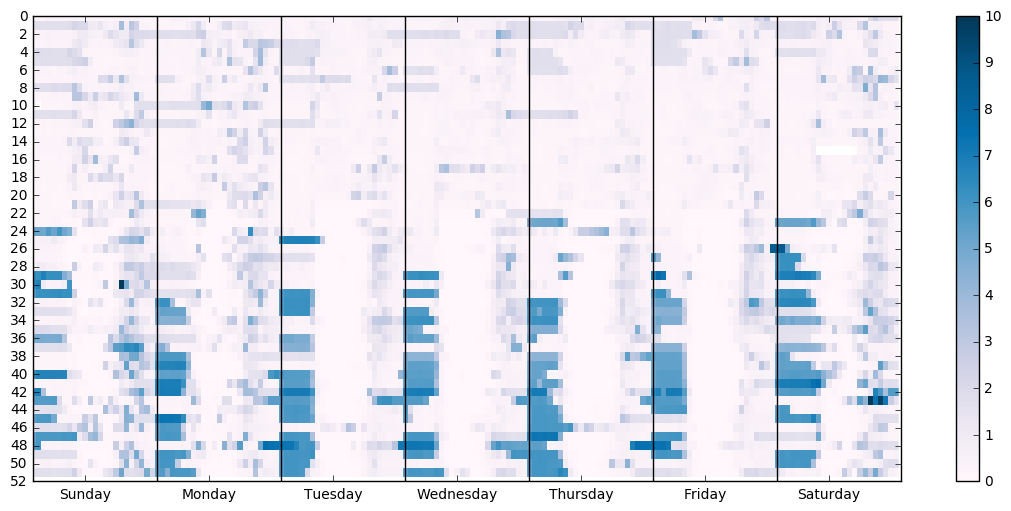

In [38]:
plt.figure(figsize = (14,6))
plt.imshow(np.reshape(df_hasEV.iloc[n,:8736].values,(52,168)), cmap="PuBu", 
               interpolation='none', vmin=0, vmax=10, aspect='auto')
plt.colorbar()
plt.plot([24,24],[0,52],"-k")
plt.plot([48,48],[0,52],"-k")
plt.plot([72,72],[0,52],"-k")
plt.plot([96,96],[0,52],"-k")
plt.plot([120,120],[0,52],"-k")
plt.plot([144,144],[0,52],"-k")
plt.xlim(0,168)
plt.ylim(52,0)

plt.gca()
yticks = range(0,53,2)
weekdays = ['Sunday','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
plt.xticks(np.arange(7)*168/7+10, weekdays)
plt.yticks(yticks);